In [1]:
from matplotlib import pyplot as plt
import numpy as np

we write here down the function to calculate all the permutations of a given set (we indicize it from 0 to n where n is the number of elements of the given set and then permute the indexes)

In [2]:
#function that moves a given element to the right by a given number of spaces (swaps position with the element in the target position)
def move_left(key, start, step):
    bound = len(key)
    end = (start+step)%bound
    key = swap(key, start, end)
    return key

def swap(key, a, b):
    t = key[a]
    key[a] = key[b]
    key[b] = t
    return key

#this is the recursive function that computes all permutations of a given sequence
def permutation(sequence):
    #the two base cases (sequence of length 2 and 3) allow to calculate all their permutations simply using the move_left function
    if len(sequence) <= 3:
        keys = []
        copy_sequence = sequence.copy()
        keys.append(copy_sequence.copy())
        bound = len(sequence)
        index = 0 
        step = 1
        copy_sequence = move_left(copy_sequence, index, step)
        index = (index + step)%bound
        while copy_sequence != sequence:
            keys.append(copy_sequence.copy())
            copy_sequence = move_left(copy_sequence, index, step)
            index = (index + step)%bound
        return keys
    #non-base cases instead need to find the so-called "keys" (read the theoretical explanation to understand the concept) in order to proceed with the permutation through the use of the move_left function. however, the keys are just the permutations of the sequence excluding the first two elements starting from the left (hence the recursion)
    else:
        lower_keys = permutation(sequence[2::])
        keys = []
        for key in lower_keys:
            original_sequence = sequence[0:2] + key
            copy_sequence = original_sequence.copy()
            keys.append(copy_sequence.copy())
            bound = len(original_sequence)
            index = 0
            step = 1
            copy_sequence = move_left(copy_sequence, index, step)
            index = (index + step)%bound            
            while copy_sequence != original_sequence:
                keys.append(copy_sequence.copy())
                copy_sequence = move_left(copy_sequence, index, step)
                index = (index + step)%bound
        return keys

just to try that's everything is alright lol, 
never trust your code

In [3]:
permutations = permutation([1, 2, 3])
print(permutations)

[[1, 2, 3], [2, 1, 3], [2, 3, 1], [1, 3, 2], [3, 1, 2], [3, 2, 1]]


plot it now

NameError: name 'cm' is not defined

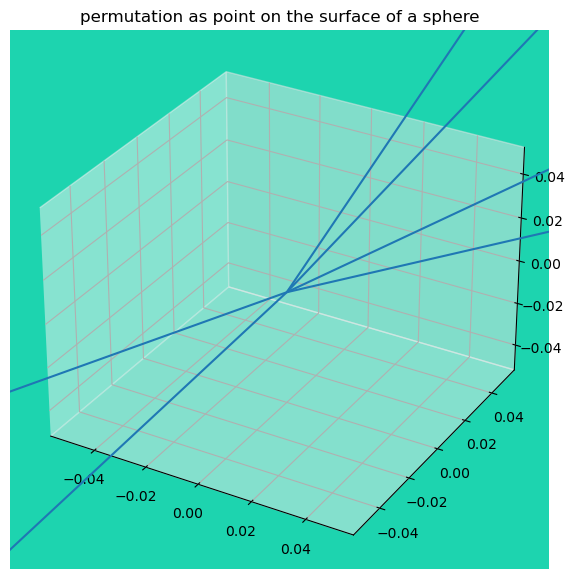

In [4]:
from matplotlib.lines import Line2D
from mpl_toolkits import mplot3d

#setting the plot to draw in 3D
fig = plt.figure(figsize = (20, 7))
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = plt.axes(projection ="3d")
plt.title("permutation as point on the surface of a sphere")

#draw the sphere
u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
r = np.sqrt(1**2 + 2**2 + 3**2)

xs = r*np.outer(np.cos(u), np.sin(v))
ys = r*np.outer(np.sin(u), np.sin(v))
zs = r*np.outer(np.ones(np.size(u)), np.cos(v))

ax.set_facecolor('#1DD4AF')

#now we divide the permutations between x, y, z

x = []
y = []
z = []

for perm in permutations:
    x.append(perm[0])
    y.append(perm[1])
    z.append(perm[2])
    #gonna plot some arrow pointin to the point form the center just because
    ax.quiver(0,0,0,perm[0],perm[1],perm[2],length=1.0, arrow_length_ratio=0.1)

ax.plot_surface(xs, ys, zs, rstride = 5, cstride = 5, cmap = cm.RdPu, alpha=0.3)
ax.scatter3D(x, y, z, marker='D', color = "yellow", alpha=1)


plt.show()


how we can clearly see in fact the point perfectly sit on the surface of the sphere.
if we manage to find a relationship between the various angles connecting the points at the center of the sphere we will probably be able to extend the principle in n dimensions so as to have a function capable of calculating the n! permutations of a given indexed set simply by calculating the development of the angles